<a href="https://colab.research.google.com/github/servant26/tes/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Understanding

Tujuan utama dari analisis ini adalah untuk mengelompokkan pelanggan berdasarkan atribut-atribut yang diberikan sehingga dapat menemukan pola-pola atau segmen-segmen yang berbeda dalam data pelanggan. Ini dapat digunakan untuk strategi pemasaran yang lebih tepat sasaran.

##Data Understanding

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Membaca data
url = 'https://drive.google.com/file/d/1Ldm9XWBUfTTseIxkdLb_F-yn2eYXZ-Di/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path, encoding='latin1')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


##Data Preparation

In [ ]:
# Menghapus baris yang mengandung nilai null
data = data.dropna()

In [ ]:
# Mengkonversi kolom 'Dt_Customer' menjadi format tanggal
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True, errors='coerce')

In [ ]:
# Melihat data numerik untuk normalisasi
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                      'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth']

# Melihat data kategori untuk encoding
categorical_features = ['Education', 'Marital_Status']

In [ ]:
# Encoding kolom kategorikal jika diperlukan
data = pd.get_dummies(data, columns=categorical_features)

In [ ]:
# Normalisasi data numerik
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
# Menghapus kolom yang tidak diperlukan untuk clustering
data = data.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Response'])

In [ ]:
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,False,False,False,False,False,False,True,False,False,False
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,False,False,False,False,False,False,True,False,False,False
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,False,False,False,False,False,False,False,True,False,False
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,False,False,False,False,False,False,False,True,False,False
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,False,True,False,False,False,True,False,False,False,False


##Modelling

###K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

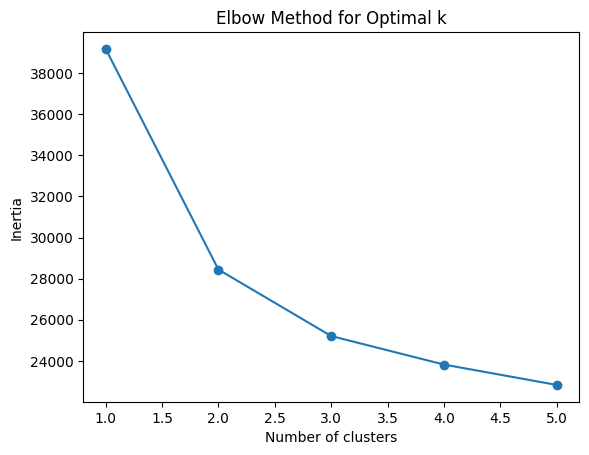

In [ ]:
# Elbow Method untuk KMeans
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Model KMeans dengan jumlah cluster terpilih
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
data['KMeans_Labels'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Hierarchical

In [ ]:
# Hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_cluster.fit(data)
data['Hierarchical_Labels'] = agg_cluster.labels_

###DBSCAN

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)
data['DBSCAN_Labels'] = dbscan.labels_

In [ ]:
unique = data['DBSCAN_Labels'].unique()
print(unique)

[-1]


In [ ]:
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,KMeans_Labels,Hierarchical_Labels,DBSCAN_Labels
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,False,False,False,True,False,False,False,2,1,-1
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,False,False,False,True,False,False,False,1,2,-1
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,False,False,False,False,True,False,False,2,1,-1
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,False,False,False,False,True,False,False,1,2,-1
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,False,False,True,False,False,False,False,1,0,-1


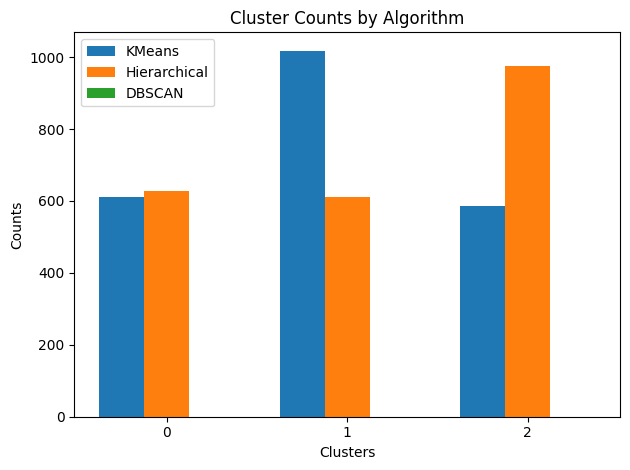

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah label clustering dari masing-masing algoritma
kmeans_counts = data['KMeans_Labels'].value_counts().sort_index()
hierarchical_counts = data['Hierarchical_Labels'].value_counts().sort_index()
dbscan_counts = data['DBSCAN_Labels'].value_counts().sort_index()

# Menyiapkan data untuk bar chart
labels = range(max(len(kmeans_counts), len(hierarchical_counts), len(dbscan_counts)))
kmeans_data = [kmeans_counts.get(label, 0) for label in labels]
hierarchical_data = [hierarchical_counts.get(label, 0) for label in labels]
dbscan_data = [dbscan_counts.get(label, 0) for label in labels]

# Membuat bar chart
bar_width = 0.25
index = np.arange(len(labels))
plt.bar(index, kmeans_data, bar_width, label='KMeans')
plt.bar(index + bar_width, hierarchical_data, bar_width, label='Hierarchical')
plt.bar(index + 2 * bar_width, dbscan_data, bar_width, label='DBSCAN')

plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Cluster Counts by Algorithm')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.tight_layout()
plt.show()